#1. Judul / Topik Project dan Identitas Lengkap

##1.1 Topik Proyek :

Analisis Perbandingan Algoritma Logistic Regression, KNN, Naive Bayes, dan SVM dalam Mengotentikasi Uang Kertas

##1.2 Identitas Lengkap:
- Nama : Muhammad Abil Wildan Syachviar
- NIM : A11.2022.14784
- Kelompok : A11.4519

#2. Ringkasan dan Permasalahan Proyek

##2.1 Ringkasan

Proyek ini bertujuan untuk melakukan analisis efektivitas algoritma klasifikasi Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, dan Support Vector Machine (SVM) dalam mendeteksi uang kertas asli atau palsu. Data yang digunakan berasal dari dataset BankNote Authentication yang mengandung fitur statistik dari gambar uang kertas yang ditransformasikan menggunakan teknik wavelet. Penelitian ini akan memberikan wawasan tentang performa setiap algoritma dan memberikan rekomendasi algoritma terbaik untuk diterapkan dalam sistem otomatisasi perbankan.

##2.2 Permasalahan Proyek

###Permasalahan yang Ingin Diselesaikan
1. Bagaimana mendeteksi uang kertas asli dan palsu secara akurat menggunakan data statistik dari gambar uang?
2. Algoritma klasifikasi mana di antara Logistic Regression, KNN, Naive Bayes, dan SVM yang memberikan hasil terbaik dalam mengklasifikasikan uang asli dan palsu?
3. Bagaimana meningkatkan efisiensi dan keandalan sistem otomatisasi perbankan dalam mendeteksi uang palsu?

###Tujuan Analisis
1. Membandingkan performa algoritma Logistic Regression, KNN, Naive Bayes, dan SVM dalam mendeteksi uang kertas asli dan palsu berdasarkan dataset BankNote Authentication.
2. Menentukan algoritma yang paling efektif berdasarkan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.
3. Memberikan rekomendasi algoritma terbaik yang dapat diimplementasikan dalam sistem nyata untuk mendeteksi uang palsu secara otomatis.

###Manfaat Proyek
1. **Keamanan Finansial**:
Mengurangi risiko distribusi uang palsu yang merugikan masyarakat dan institusi keuangan.

2. **Efisiensi Operasional**:
Meningkatkan akurasi dan kecepatan dalam pendeteksian uang palsu oleh sistem otomatisasi seperti ATM dan mesin penghitung uang.

3. **Kepercayaan Pelanggan**:
Membantu memperkuat kepercayaan pengguna terhadap layanan perbankan berbasis otomatisasi dengan memastikan keandalan deteksi uang palsu.

4. **Optimasi Sistem Perbankan**:
Memberikan dasar bagi pengembangan sistem deteksi uang palsu yang lebih efektif dengan algoritma yang sudah teruji performanya.

##2.3 Alur Penyelesaian

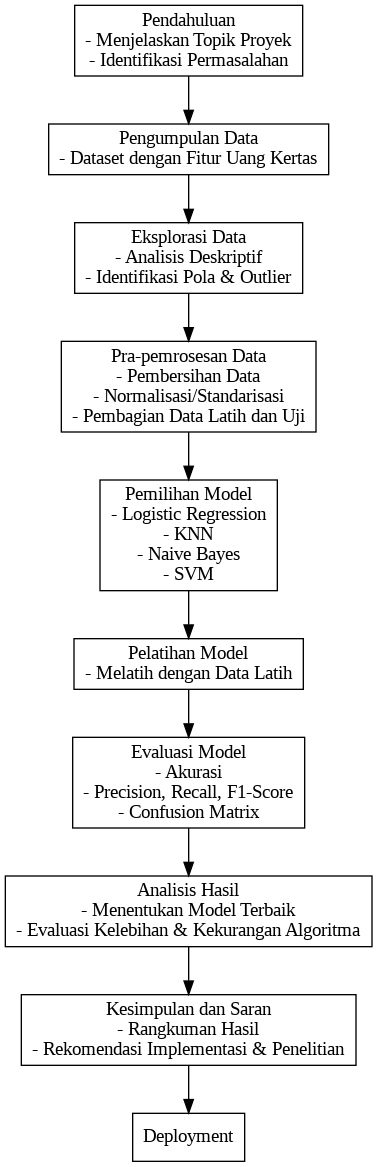

In [166]:
from IPython.display import Image, display

# Tampilkan gambar
display(Image(filename='alur_penyelesaian_proyek.png'))

#3. Penjelasan Dataset, EDA, dan Proses Features Dataset

##3.1 Penjelasan Dataset

**Sumber Data**:

[Kaggle] https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci

**Tujuan Dataset**:

Dataset digunakan untuk mengklasifikasikan uang kertas (banknote) sebagai asli atau palsu berdasarkan fitur statistik yang dihasilkan dari gambar uang tersebut.

**Jumlah baris**: 1.372

**Jumlah kolom**:
5 (4 fitur numerik kontinu dan 1 kolom target kategori biner).

**Atribut dalam Dataset**:

1. Variance (Variansi):
  - Mengukur sebaran nilai piksel gambar setelah transformasi Wavelet.
  - Membantu mendeteksi pola visual pada uang kertas.
2. Skewness (Kecondongan):
  - Mengukur asimetri distribusi piksel gambar.
  - Menunjukkan pola distribusi unik pada uang asli atau palsu.
3. Curtosis (Kurtosis):
  - Mengukur ketinggian atau puncak distribusi piksel gambar.
  - Berguna untuk membedakan tekstur atau pola uang kertas.
4. Entropy (Entropi):
  - Mengukur tingkat kerumitan atau keacakan pola dalam gambar.
  - Mengidentifikasi perbedaan kompleksitas antara uang asli dan palsu.
5. Class (Kelas Target):
  - 0: Uang palsu.
  - 1: Uang asli.

**Tipe Data**:
- Empat atribut numerik kontinu yang merepresentasikan karakteristik statistik gambar uang kertas.
- Satu atribut kategori biner (class) untuk klasifikasi status uang.

**Ciri Utama Dataset**:
- Tidak ada nilai yang hilang (missing values).
- Dataset berukuran kecil namun cukup representatif untuk keperluan klasifikasi.
- Distribusi kelas target relatif seimbang, sehingga memudahkan analisis tanpa perlu penyesuaian khusus untuk ketidakseimbangan data.

##3.2 Exploratory Data Analysis (EDA)

###Import Libraries

In [140]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [141]:
# Load Dataset
df = pd.read_csv('/content/BankNoteAuthentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


###Labeling

In [142]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
df.columns = labels
print('Columns Names:', df.columns, '\n')
print('Data Describe:\n ', df.describe(), '\n')
print('Data Information:'); print(df.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1 

###Distribusi Kelas (Target)

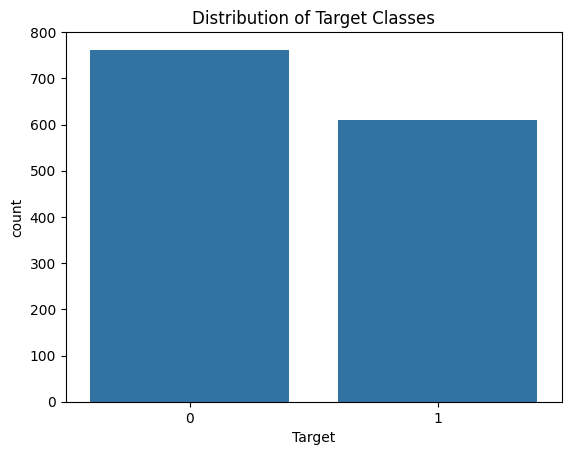

In [143]:
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Classes')
plt.show()

###Histogram

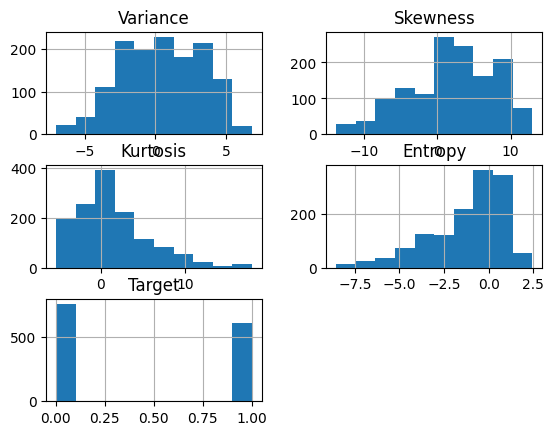

In [144]:
# Data histogram
df.hist()
plt.show()

###Boxplot untuk Deteksi Outlier
Boxplot dapat membantu Anda mendeteksi outlier dalam dataset, yang mungkin mempengaruhi model prediksi.

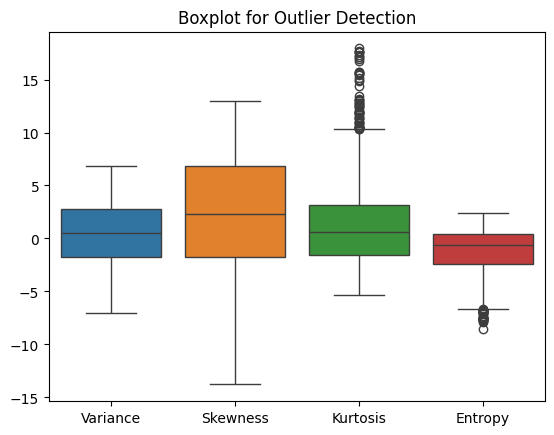

In [145]:
sns.boxplot(data=df[['Variance', 'Skewness', 'Kurtosis', 'Entropy']])
plt.title('Boxplot for Outlier Detection')
plt.show()

###Pairplot
Membuat grid plot yang menunjukkan hubungan antar fitur dalam dataset.

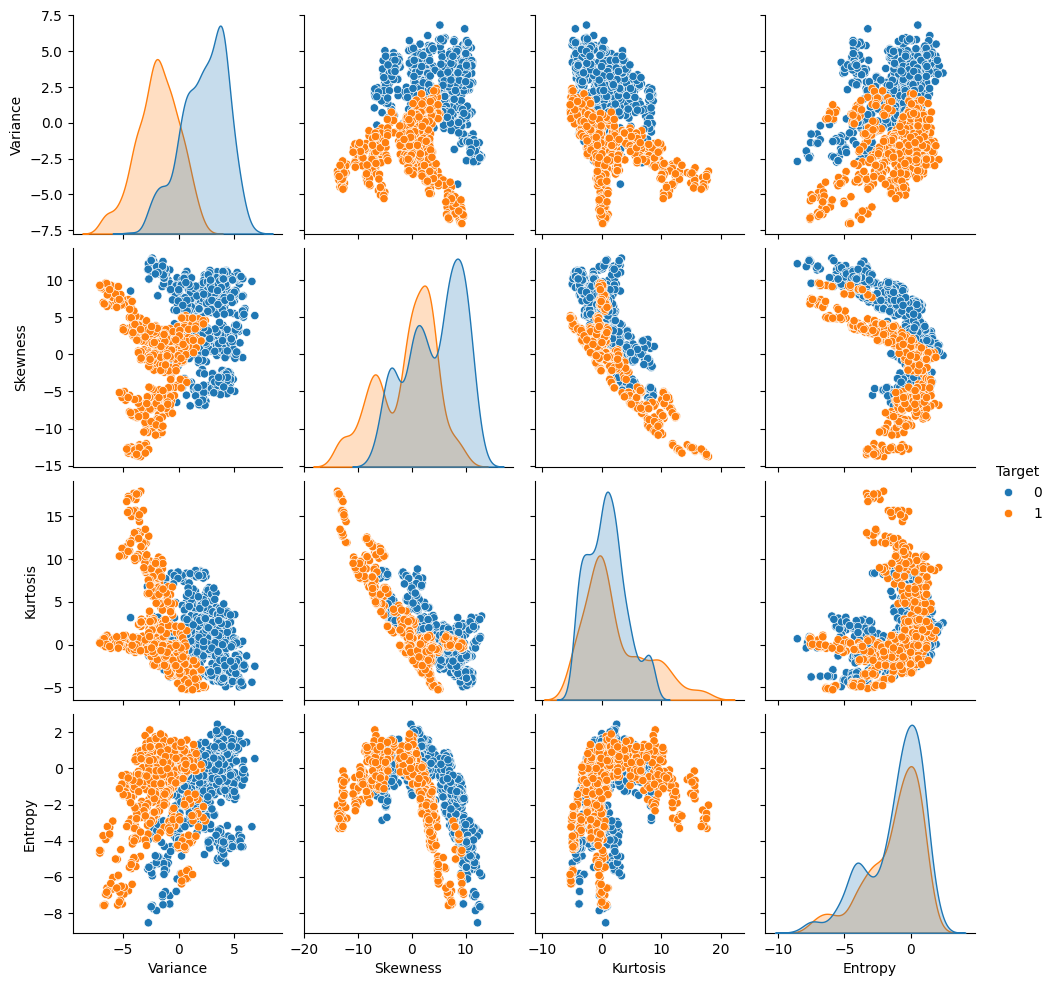

In [146]:
sns.pairplot(data=df, hue='Target')
plt.show()

###Correlation
Heatmap memberi gambaran visual yang jelas tentang hubungan antar fitur,

Correlation:
Target      1.000000
Kurtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Target, dtype: float64


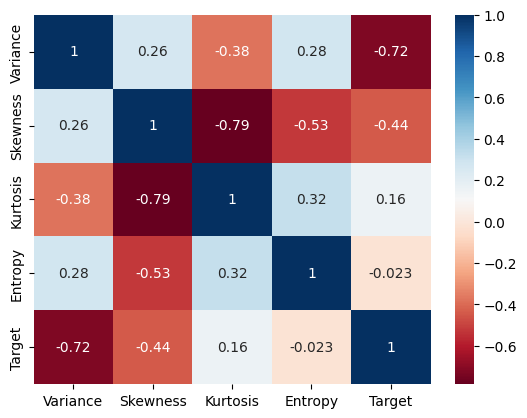

In [147]:
# Check correlation
print('Correlation:')
print(df.corr()['Target'].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [148]:
print('Number of Authentication= ', df['Target'][df['Target'] == 0].count())
print('Number of Unauthenticated= ', df['Target'][df['Target'] == 1].count())

Number of Authentication=  762
Number of Unauthenticated=  610


##3.3 Proses Features Dataset

###Data Preparation

In [149]:
# Data preparation and Exploration
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1], '\n')
print('SubSet of Data:\n ', df.head(), '\n')

Number of Rows:  1372
Number of Columns:  5 

SubSet of Data:
     Variance  Skewness  Kurtosis  Entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0 



###Memeriksa dan Menangani Missing Values

In [150]:
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Target      0
dtype: int64


In [151]:
# Fill missing values with mean (if any)
df.fillna(df.mean(), inplace=True)

###Labeling

In [152]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
df.columns = labels
print('Columns Names:', df.columns, '\n')
print('Data Describe:\n ', df.describe(), '\n')
print('Data Information:'); print(df.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1 

###Cek Data yang Duplikat
Mengidentifikasi nilai yang hilang (NA/null).

In [153]:
# Check For duplicated
print(df.duplicated().any())
duplicated = df.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


###Memisahkan data Latih dan Uji
Membagi dataset menjadi data pelatihan dan pengujian dengan rasio 7:3.

In [154]:
from sklearn.model_selection import train_test_split

# data Split
x = df.drop('Target', axis=1).values
y = df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(960, 4)
(960,)


#4. Proses Learning / Modeling

##4.1 Logistic Regression Algorithm

In [155]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Accuracy of Logistic Regression Algorithm:  98.7864077669903


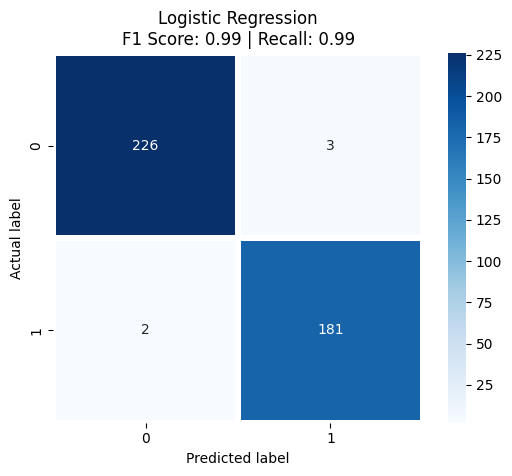

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve

# Logistic Regression
log = LogisticRegression()

# fitting data
log.fit(X_train, y_train)

# Predicted data
y_predicted_log = log.predict(X_test)

# Logistic Regression Results
print('Classification Report (Logistic Regression):')
print(metrics.classification_report(y_test, y_predicted_log))

# Accuracy score matrix
accuracy_log = metrics.accuracy_score(y_test, y_predicted_log) * 100
print('Accuracy of Logistic Regression Algorithm: ', accuracy_log)

# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predicted_log, average='micro')

# Precision
precision_log = metrics.precision_score(y_test, y_predicted_log, average='micro')

# Confusion matrix
cm_log = metrics.confusion_matrix(y_test, y_predicted_log)

# Recall
recall_log = metrics.recall_score(y_test, y_predicted_log)

# ROC AUC Score (Logistic Regression)
roc_auc_log = roc_auc_score(y_test, log.predict_proba(X_test)[:,1])

# Support
support_log = metrics.classification_report(y_test, y_predicted_log, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Logistic Regression\nF1 Score: {f1_score_log:.2f} | Recall: {recall_log:.2f}')
plt.show()

##4.2 KNN Algorithm

Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of KNN Algorithm:  100.0


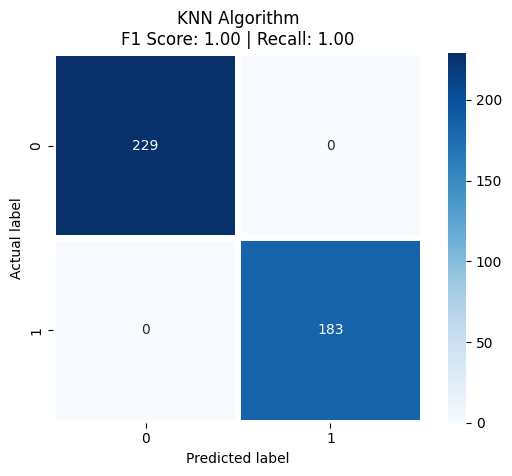

In [157]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)

# fitting training data
knn.fit(X_train, y_train)

# predicted data
y_predicted_knn = knn.predict(X_test)

# KNN Results
print("Classification Report (KNN):")
print(metrics.classification_report(y_test, y_predicted_knn))

# Accuracy score matrix
accuracy_knn = metrics.accuracy_score(y_test, y_predicted_knn) * 100
print('Accuracy of KNN Algorithm: ', accuracy_knn)

# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predicted_knn, average='micro')

# Precision
precision_knn = metrics.precision_score(y_test, y_predicted_knn, average='micro')

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_predicted_knn)

# Recall
recall_knn = metrics.recall_score(y_test, y_predicted_knn)

# ROC AUC Score (KNN)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

# Support
support_knn = metrics.classification_report(y_test, y_predicted_knn, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'KNN Algorithm\nF1 Score: {f1_score_knn:.2f} | Recall: {recall_knn:.2f}')
plt.show()

##4.3 Naive Bayes Algorithm

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       229
           1       0.86      0.75      0.80       183

    accuracy                           0.84       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.84      0.84       412

Accuracy of Naive Bayes Algorithm:  83.7378640776699


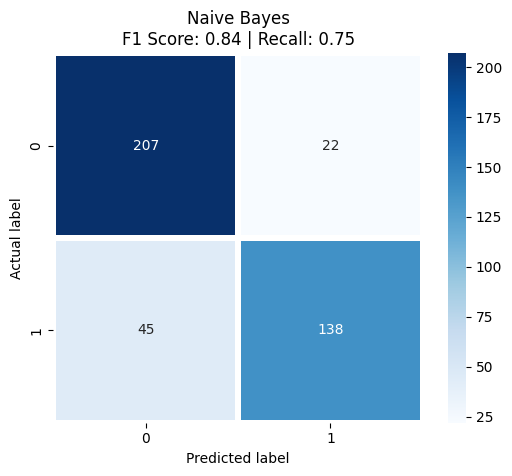

In [158]:
# Naive Bayes Algorithm
gnb = GaussianNB()

# fitting training data
gnb.fit(X_train, y_train)

# predicted data
y_predicted_NB = gnb.predict(X_test)

# Naive Bayes Results
print('Classification Report (Naive Bayes):')
print(metrics.classification_report(y_test, y_predicted_NB))

# Accuracy score matrix
accuracy_NB = metrics.accuracy_score(y_test, y_predicted_NB) * 100
print('Accuracy of Naive Bayes Algorithm: ', accuracy_NB)

# F1 Score
f1_score_NB = metrics.f1_score(y_test, y_predicted_NB, average='micro')

# Precision
precision_NB = metrics.precision_score(y_test, y_predicted_NB, average='micro')

# Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test, y_predicted_NB)

# Recall
recall_NB = metrics.recall_score(y_test, y_predicted_NB)

# ROC AUC Score (Naive Bayes)
roc_auc_NB = roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])

# Support
support_NB = metrics.classification_report(y_test, y_predicted_NB, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naive Bayes\nF1 Score: {f1_score_NB:.2f} | Recall: {recall_NB:.2f}')
plt.show()

##4.4 SVM Algorithm

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of SVM Algorithm:  100.0


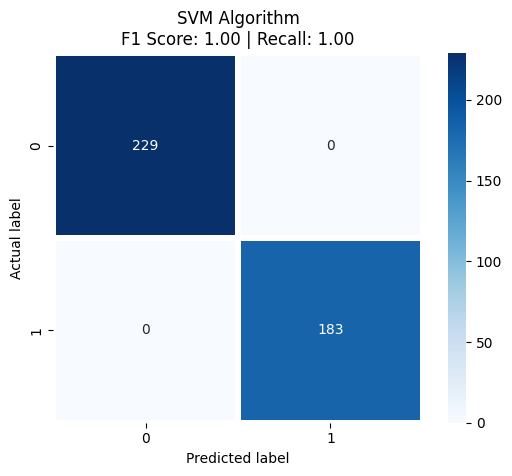

In [159]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM dengan probability=True untuk memungkinkan predict_proba
svm = SVC(kernel='rbf', C=100.0, probability=True)

# Fitting data
svm.fit(X_train, y_train)

# Predicted data
y_predicted_SVM = svm.predict(X_test)

# SVM Results
print('Classification Report (SVM):')
print(metrics.classification_report(y_test, y_predicted_SVM))

# Accuracy score matrix
accuracy_SVM = metrics.accuracy_score(y_test, y_predicted_SVM) * 100
print('Accuracy of SVM Algorithm: ', accuracy_SVM)

# F1 Score
f1_score_SVM = metrics.f1_score(y_test, y_predicted_SVM, average='micro')

# Precision
precision_SVM = metrics.precision_score(y_test, y_predicted_SVM, average='micro')

# Confusion matrix
cm_SVM = metrics.confusion_matrix(y_test, y_predicted_SVM)

# Recall
recall_SVM = metrics.recall_score(y_test, y_predicted_SVM)

# ROC AUC Score (SVM)
roc_auc_SVM = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

# Support
support_SVM = metrics.classification_report(y_test, y_predicted_SVM, output_dict=True)['1']['support']

# Heatmap confusion matrix
sns.heatmap(cm_SVM, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'SVM Algorithm\nF1 Score: {f1_score_SVM:.2f} | Recall: {recall_SVM:.2f}')
plt.show()

#5. Performa Model

##5.1 Perbandingan Skor F1 Score, Recall, Precision, precisions, Accuracy

<ipython-input-160-f575f8e4eb2b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'F1 Score'], x='Score', y='Model', palette='magma', ax=axes[0, 0])
<ipython-input-160-f575f8e4eb2b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'Recall'], x='Score', y='Model', palette='viridis', ax=axes[0, 1])
<ipython-input-160-f575f8e4eb2b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df[scores_df['Metric'] == 'Precision'], x='Score', y='Model', palette='coolw

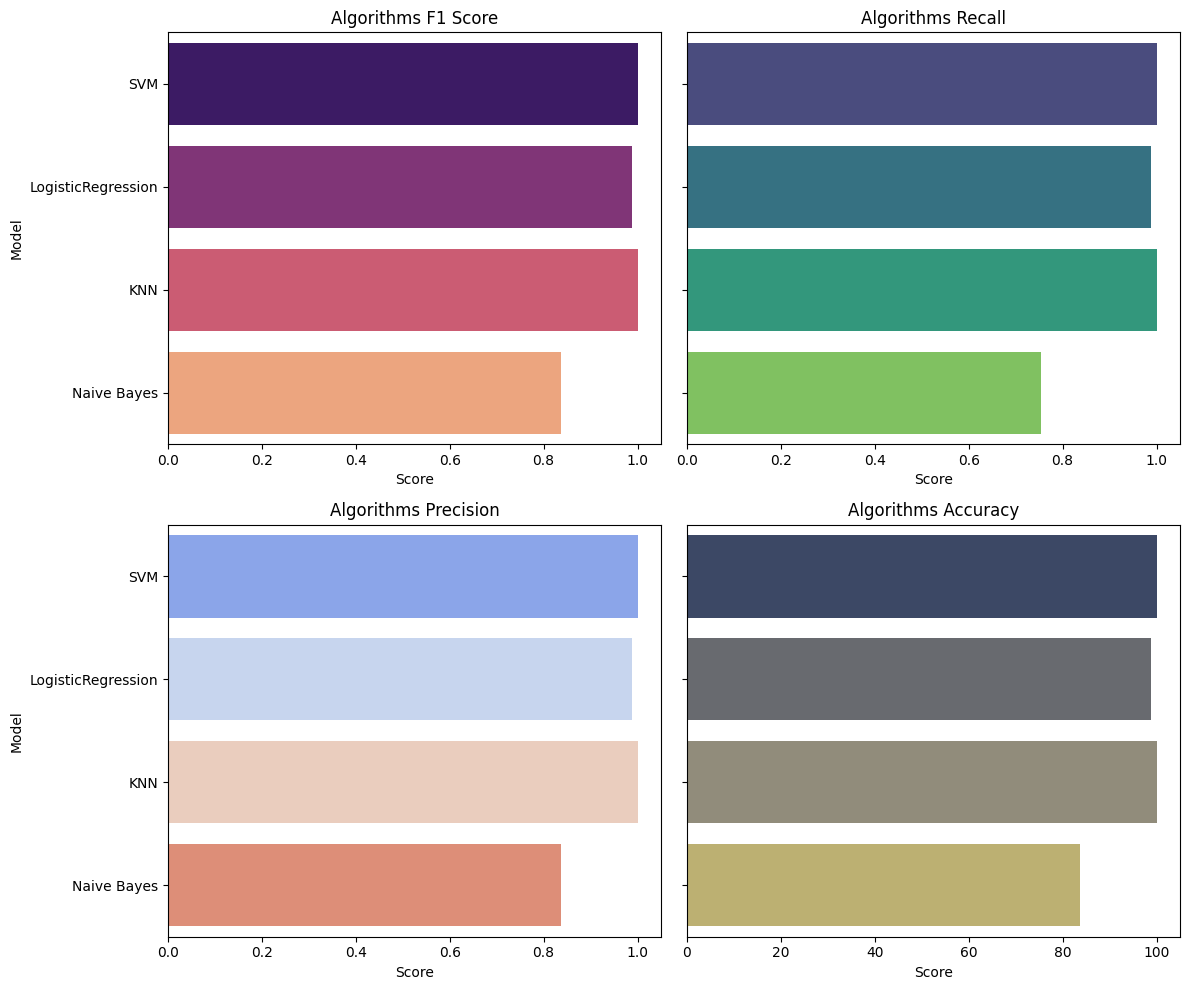

In [160]:
# Creating the Comparison DataFrame
model_f1_score = [f1_score_SVM, f1_score_log, f1_score_knn, f1_score_NB]
recalls = [recall_SVM, recall_log, recall_knn, recall_NB]
precisions = [precision_SVM, precision_log, precision_knn, precision_NB]
accuracies = [accuracy_SVM, accuracy_log, accuracy_knn, accuracy_NB]
roc_auc_scores = [roc_auc_SVM, roc_auc_log, roc_auc_knn, roc_auc_NB]
supports = [support_SVM, support_log, support_knn, support_NB]
model_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']

# Merging data for easier visualization
scores_df = pd.DataFrame({
    'Model': model_name,
    'F1 Score': model_f1_score,
    'Recall': recalls,
    'Precision': precisions,
    'Accuracy': accuracies,
    'ROC AUC': roc_auc_scores,
    'Support': supports
}).melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
sns.barplot(data=scores_df[scores_df['Metric'] == 'F1 Score'], x='Score', y='Model', palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Algorithms F1 Score')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Recall'], x='Score', y='Model', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Algorithms Recall')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Precision'], x='Score', y='Model', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Algorithms Precision')
sns.barplot(data=scores_df[scores_df['Metric'] == 'Accuracy'], x='Score', y='Model', palette='cividis', ax=axes[1, 1])
axes[1, 1].set_title('Algorithms Accuracy')

plt.tight_layout()
plt.show()

##5.2 ROC Curve Data
Grafik ROC curve untuk setiap model untuk membandingkan performa mereka dalam hal trade-off antara true positive rate (TPR) dan false positive rate (FPR).

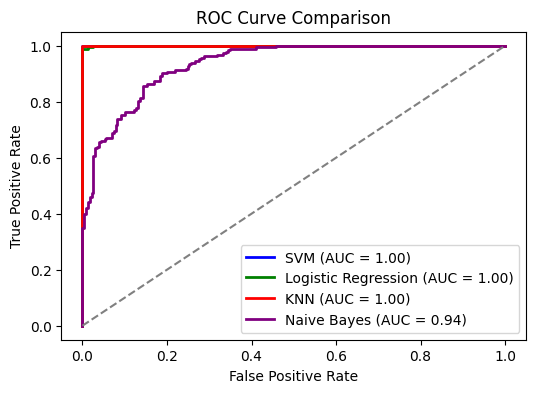

In [133]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve data
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_log, tpr_log, _ = roc_curve(y_test, log.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

##5.3 Precision-Recall Curve Data
Menghitung dan memplot Precision-Recall curve untuk tiap model.

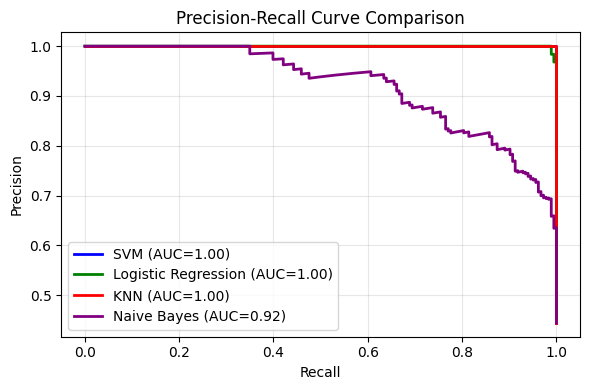

In [134]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate Precision-Recall curve data and AUC for each model
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1])
auc_svm = auc(recall_svm, precision_svm)

precision_log, recall_log, _ = precision_recall_curve(y_test, log.predict_proba(X_test)[:, 1])
auc_log = auc(recall_log, precision_log)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
auc_knn = auc(recall_knn, precision_knn)

precision_nb, recall_nb, _ = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:, 1])
auc_nb = auc(recall_nb, precision_nb)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'SVM (AUC={auc_svm:.2f})')
plt.plot(recall_log, precision_log, color='green', lw=2, label=f'Logistic Regression (AUC={auc_log:.2f})')
plt.plot(recall_knn, precision_knn, color='red', lw=2, label=f'KNN (AUC={auc_knn:.2f})')
plt.plot(recall_nb, precision_nb, color='purple', lw=2, label=f'Naive Bayes (AUC={auc_nb:.2f})')

# Customize plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##5.4 Cross-validation Model
Cross-validation untuk mengevaluasi performa model dengan lebih akurat, termasuk nilai mean dan standar deviasi dari skor.

In [135]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
cv_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
cv_log = cross_val_score(log, X_train, y_train, cv=5, scoring='accuracy')
cv_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_nb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy for SVM: {cv_svm.mean():.2f} ± {cv_svm.std():.2f}")
print(f"Cross-validation accuracy for Logistic Regression: {cv_log.mean():.2f} ± {cv_log.std():.2f}")
print(f"Cross-validation accuracy for KNN: {cv_knn.mean():.2f} ± {cv_knn.std():.2f}")
print(f"Cross-validation accuracy for Naive Bayes: {cv_nb.mean():.2f} ± {cv_nb.std():.2f}")

Cross-validation accuracy for SVM: 1.00 ± 0.00
Cross-validation accuracy for Logistic Regression: 0.99 ± 0.01
Cross-validation accuracy for KNN: 1.00 ± 0.00
Cross-validation accuracy for Naive Bayes: 0.84 ± 0.02


##5.5 Learning Curve
Learning curve membantu untuk melihat bagaimana model bekerja seiring dengan peningkatan jumlah data.

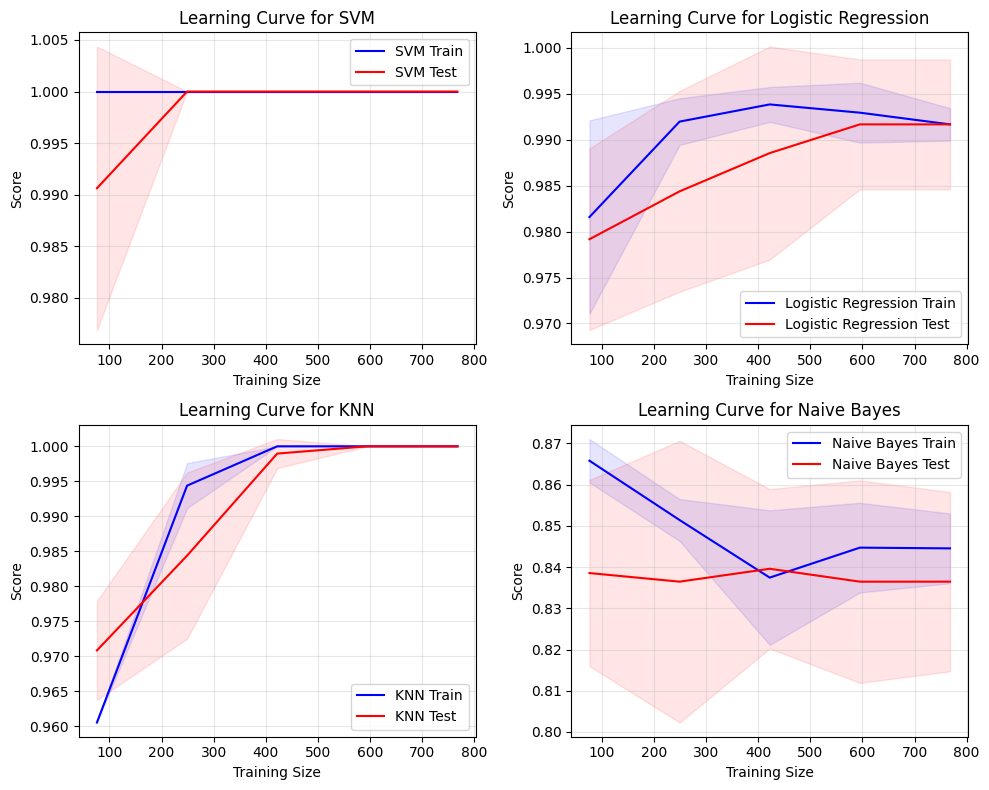

In [136]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, ax, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

    # Mean and standard deviation for confidence intervals
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_mean, label=f'{model_name} Train', color='blue')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)

    ax.plot(train_sizes, test_mean, label=f'{model_name} Test', color='red')
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

    ax.set_title(f'Learning Curve for {model_name}')
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Score')
    ax.legend()
    ax.grid(alpha=0.3)

# Plot all learning curves
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

plot_learning_curve(svm, X_train, y_train, axes[0, 0], 'SVM')
plot_learning_curve(log, X_train, y_train, axes[0, 1], 'Logistic Regression')
plot_learning_curve(knn, X_train, y_train, axes[1, 0], 'KNN')
plot_learning_curve(gnb, X_train, y_train, axes[1, 1], 'Naive Bayes')

plt.tight_layout()
plt.show()

##5.6 Metrics (Specificity)
Mengukur kemampuan model dalam mengidentifikasi negative class.

In [137]:
specificity_svm = cm_SVM[0, 0] / (cm_SVM[0, 0] + cm_SVM[0, 1])
specificity_log = cm_log[0, 0] / (cm_log[0, 0] + cm_log[0, 1])
specificity_knn = cm_knn[0, 0] / (cm_knn[0, 0] + cm_knn[0, 1])
specificity_nb = cm_mnb[0, 0] / (cm_mnb[0, 0] + cm_mnb[0, 1])

print(f"Specificity for SVM: {specificity_svm:.2f}")
print(f"Specificity for Logistic Regression: {specificity_log:.2f}")
print(f"Specificity for KNN: {specificity_knn:.2f}")
print(f"Specificity for Naive Bayes: {specificity_nb:.2f}")

Specificity for SVM: 1.00
Specificity for Logistic Regression: 0.99
Specificity for KNN: 1.00
Specificity for Naive Bayes: 0.90


#6. Diskusi Hasil dan Kesimpulan

##6.1 Diskusi Hasil

**Performa Keseluruhan Algoritma**:

- SVM dan KNN memberikan hasil terbaik dengan nilai sempurna pada semua metrik evaluasi, yaitu accuracy, precision, recall, dan f1-score sebesar 100%.
- Logistic Regression memiliki performa yang hampir sempurna dengan accuracy sebesar 98.79%, didukung oleh precision, recall, dan f1-score yang tinggi (99%) untuk kedua kelas. Algoritma ini juga menunjukkan konsistensi yang baik pada data validasi.
- Naive Bayes memiliki performa terendah dengan accuracy 83.74%. Hasil ini menunjukkan bahwa algoritma ini kurang efektif dalam mendeteksi uang palsu, terutama pada kelas uang asli, dengan nilai recall hanya sebesar 75%.

**ROC dan Precision-Recall Curve**:

- AUC pada ROC dan Precision-Recall Curve menunjukkan bahwa SVM, KNN, dan Logistic Regression memiliki kemampuan sempurna untuk membedakan uang asli dan palsu (AUC = 1).
- Naive Bayes memiliki AUC yang lebih rendah (ROC = 0.94, Precision-Recall = 0.92), mengindikasikan keterbatasan algoritma ini dalam memproses dataset ini.

**Cross-Validation Accuracy**:

- Konsistensi performa pada data baru terlihat dari nilai cross-validation accuracy. SVM dan KNN mencapai nilai sempurna (1.00 ± 0.00), sedangkan Logistic Regression mendekati sempurna (0.99 ± 0.01).
- Naive Bayes menunjukkan kinerja yang lebih tidak stabil (0.84 ± 0.02).

**Spesifisitas**:

- SVM dan KNN memiliki spesifisitas sempurna (1.00), menunjukkan bahwa kedua algoritma ini tidak salah dalam mengklasifikasikan uang asli sebagai palsu. Logistic Regression sedikit di bawahnya dengan spesifisitas 0.99.
- Naive Bayes menunjukkan spesifisitas yang lebih rendah (0.90), menandakan lebih banyak kesalahan dalam mendeteksi uang asli.

##6.2 Jawaban Ringkas dari Permasalahan

**Bagaimana mendeteksi uang kertas asli dan palsu secara akurat?**

- Uang kertas dapat dideteksi menggunakan data statistik dari gambar uang dengan algoritma klasifikasi seperti SVM, KNN, Logistic Regression, atau Naive Bayes.
- Algoritma SVM dan KNN memberikan hasil terbaik dengan akurasi sempurna (100%).

**Algoritma mana yang terbaik?**
- SVM dan KNN adalah algoritma terbaik karena memberikan akurasi, presisi, recall, dan f1-score sempurna.
- Logistic Regression juga baik (akurasi 98.79%), sedangkan Naive Bayes memiliki performa paling rendah.

**Bagaimana meningkatkan efisiensi dan keandalan sistem deteksi uang palsu?**
- Gunakan algoritma SVM atau KNN untuk akurasi tinggi.
- Pilih Logistic Regression untuk alternatif yang lebih cepat pada dataset besar.
- Integrasikan algoritma dengan perangkat otomatisasi (seperti sensor atau kamera).
- Perbarui model secara berkala agar tetap relevan dengan perkembangan uang palsu.

##6.3 Kesimpulan

**Kesimpulan Ringkas**  

1. **Algoritma Terbaik:**  
   SVM dan KNN adalah algoritma terbaik dengan akurasi sempurna, sangat andal, dan konsisten, menjadikannya pilihan utama untuk implementasi nyata.  

2. **Alternatif:**  
   Logistic Regression dapat digunakan sebagai alternatif yang lebih sederhana dan cepat dengan akurasi mendekati optimal.  

3. **Kurang Direkomendasikan:**  
   Naive Bayes memiliki performa rendah, terutama dalam mendeteksi uang asli, sehingga kurang cocok untuk tugas ini.  

4. **Rekomendasi Implementasi:**  
   - Gunakan SVM atau KNN untuk akurasi dan keandalan tinggi.  
   - Pilih Logistic Regression jika efisiensi komputasi menjadi prioritas.  
   - Pertimbangkan ukuran dataset karena SVM dan KNN mungkin kurang efisien untuk dataset besar.  

#7. Deployment

##7.1 app.py

In [ ]:
import streamlit as st
import numpy as np
import joblib
import os

# Load model dengan penanganan error
model = None
try:
    if not os.path.exists('model.pkl'):
        st.error("File model.pkl tidak ditemukan! Pastikan file tersebut ada di direktori aplikasi.")
    else:
        model = joblib.load('model.pkl')
except Exception as e:
    st.error(f"Terjadi kesalahan saat memuat model: {e}")

# Judul aplikasi
st.title("Bank Note Authentication App")
st.write("Aplikasi ini memprediksi apakah bank note asli atau palsu berdasarkan data input. dibuat oleh A11.2022.14784")

# Input data
st.header("Masukkan Nilai")
variance = st.number_input("Variance", value=0.0, help="Nilai variance dari fitur bank note.")
skewness = st.number_input("Skewness", value=0.0, help="Nilai skewness dari fitur bank note.")
curtosis = st.number_input("Curtosis", value=0.0, help="Nilai curtosis dari fitur bank note.")
entropy = st.number_input("Entropy", value=0.0, help="Nilai entropy dari fitur bank note.")

# Prediksi
if st.button("Predict"):
    if model is None:
        st.error("Model belum dimuat. Periksa file model.pkl Anda.")
    else:
        # Masukkan data ke model
        input_data = np.array([[variance, skewness, curtosis, entropy]])
        st.write(f"Input data: {input_data}")  # Log untuk debugging

        try:
            prediction = model.predict(input_data)

            # Tampilkan hasil
            if prediction[0] == 0:
                st.success("Hasil: Bank Note Asli")
            else:
                st.error("Hasil: Bank Note Palsu")
        except Exception as e:
            st.error(f"Terjadi kesalahan saat melakukan prediksi: {e}")

##7.2 requirements.txt

In [ ]:
streamlit
numpy
joblib
scikit-learn

##7.3 model.pkl

###SVM model.pkl

In [ ]:
import joblib

# Simpan model ke file model.pkl
model_filename = "model.pkl"
joblib.dump(svm, model_filename)
print(f"Model telah disimpan ke {model_filename}")

Model telah disimpan ke model.pkl


###KNN model.pkl

In [ ]:
import joblib

# Simpan model ke file model.pkl
model_filename = "model.pkl"
joblib.dump(knn, model_filename)
print(f"Model telah disimpan ke {model_filename}")

Model telah disimpan ke model.pkl


##7.4 Link Deployment Streamlit

https://bank-note-app-app-ebeirmd3o3rjrddquc9rh2.streamlit.app/